In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/120dog breeds-224.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/projectDataset224')

In [ ]:
import pandas as pd
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import applications
from keras.layers import Activation, Dropout, Flatten, Dense,GlobalAveragePooling2D, BatchNormalization

In [ ]:
import pathlib
from keras.preprocessing.image import ImageDataGenerator


data_dir = pathlib.Path('/content/projectDataset224/120dog breeds-224')

data_train = data_dir / 'train'

test_dir = data_dir / 'test'


labels_csv = pd.read_csv('/content/drive/MyDrive/labels.csv')
labels_csv['id'] = [str(fname) + '.jpg' for fname in labels_csv['id']]

In [ ]:
batch_size = 16
img_size = 224

In [ ]:
# datagen = ImageDataGenerator(preprocessing_function = keras.applications.resnet50.preprocess_input, validation_split=0.2)
# train_generator = datagen.flow_from_dataframe(
#                         dataframe = labels_csv,
#                         directory = data_train,
#                         subset='training',
#                         x_col='id',
#                         y_col='breed',
#                         batch_size=batch_size,
#                         shuffle=True,
#                         class_mode='sparse',
#                         color_mode='rgb',
#                         target_size=(img_size, img_size))

# validation_generator = datagen.flow_from_dataframe(
#                         dataframe = labels_csv,
#                         directory = data_train,
#                         subset='validation',
#                         x_col='id', 
#                         y_col='breed',
#                         batch_size=batch_size,
#                         shuffle=True,
#                         class_mode='sparse',
#                         color_mode='rgb',
#                         target_size=(img_size, img_size))


train_datagen = ImageDataGenerator(
    preprocessing_function=keras.applications.resnet50.preprocess_input,
    validation_split=0.2,
    rotation_range=5,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.05,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True
)


train_generator = train_datagen.flow_from_dataframe(
    dataframe=labels_csv,
    directory=data_train,
    subset='training',
    x_col='id',
    y_col='breed',
    batch_size=batch_size,
    shuffle=True,
    class_mode='sparse',
    color_mode='rgb',
    target_size=(img_size, img_size)
)

validation_datagen = ImageDataGenerator(
    preprocessing_function = keras.applications.resnet50.preprocess_input, 
    validation_split=0.2
)

validation_generator = validation_datagen.flow_from_dataframe(
    dataframe=labels_csv,
    directory=data_train,
    subset='validation',
    x_col='id',
    y_col='breed',
    batch_size=batch_size,
    shuffle=True,
    class_mode='sparse',
    color_mode='rgb',
    target_size=(img_size, img_size)
)


In [ ]:
resnet50 = keras.applications.ResNet50(include_top=False, weights='imagenet',input_shape=(224,224,3))

for layer in resnet50.layers:
    layer.trainable=False

model = Sequential()
model.add(resnet50)
model.add(BatchNormalization())
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(120, activation='softmax'))
model.summary()

optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              #loss='categorical_crossentropy',
              #loss='SparseSoftmaxCrossEntropyWithLogits',
              #loss='SparseSoftmaxCrossEntropyWithLogits',
              metrics=['accuracy'])

94765736/94765736 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 batch_normalization (BatchN  (None, 7, 7, 2048)       8192      
 ormalization)                                                   
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 2048)              4196352   
                                                         

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_res = model.fit(train_generator, epochs=20, verbose = 1,
                       validation_data=validation_generator)

# from keras.callbacks import ModelCheckpoint, EarlyStopping


# checkpoint_cb = ModelCheckpoint("/content/drive/MyDrive/Resnet50-Epoch50DataAugmentationHigh.h5", save_best_only=True)
# early_stopping_cb = EarlyStopping(patience=5, restore_best_weights=True)


# history_res = model.fit(train_generator, epochs=50, verbose = 1,
#                         validation_data=validation_generator,
#                         callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
512/512 [==============================] - 158s 276ms/step - loss: 3.6929 - accuracy: 0.2382 - val_loss: 2.1377 - val_accuracy: 0.6164
Epoch 2/20
512/512 [==============================] - 135s 263ms/step - loss: 1.9537 - accuracy: 0.5668 - val_loss: 1.2118 - val_accuracy: 0.7138
Epoch 3/20
512/512 [==============================] - 135s 263ms/step - loss: 1.3498 - accuracy: 0.6620 - val_loss: 0.9621 - val_accuracy: 0.7275
Epoch 4/20
512/512 [==============================] - 135s 264ms/step - loss: 1.0892 - accuracy: 0.7082 - val_loss: 0.8564 - val_accuracy: 0.7544
Epoch 5/20
512/512 [==============================] - 134s 261ms/step - loss: 0.9616 - accuracy: 0.7316 - val_loss: 0.8124 - val_accuracy: 0.7554
Epoch 6/20
512/512 [==============================] - 135s 263ms/step - loss: 0.8466 - accuracy: 0.7543 - val_loss: 0.7833 - val_accuracy: 0.7613
Epoch 7/20
512/512 [==============================] - 137s 267ms/step - loss: 0.7858 - accuracy: 0.7684 - val_loss: 0.7600 -

In [ ]:
model.save('/content/drive/MyDrive/Resnet50-120Breeds_Version2_New.h5')

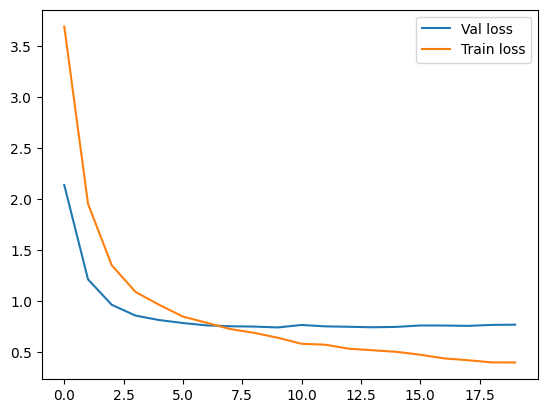

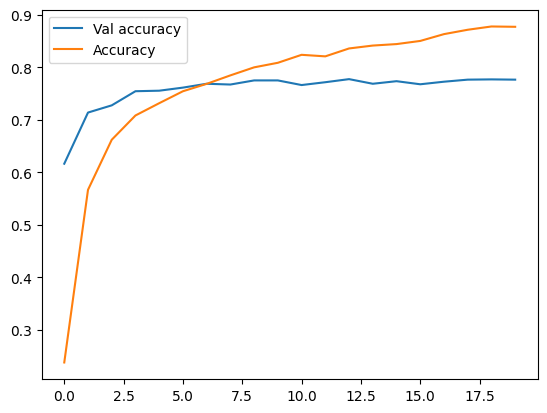

In [ ]:
plt.figure()
plt.plot(history_res .history['val_loss'], label = 'Val loss')
plt.plot(history_res .history['loss'], label = 'Train loss')
plt.legend()
plt.show()
plt.figure()
plt.plot(history_res .history['val_accuracy'], label = 'Val accuracy')
plt.plot(history_res .history['accuracy'], label = 'Accuracy')
plt.legend()
plt.show()